# Loan Interest Rate and Loan Grade

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas
import numpy
import matplotlib
import matplotlib.pyplot as plt
import itertools
import sklearn
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [4]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [5]:
data = loan_approval_lib.load_original_data()

In [6]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30,0
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19,0
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28,1
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26,0


In [7]:
columns = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_default_on_file'
]

for column in columns:
    row_count_1 = len(data)

    if column == 'person_age':
        data = data[data['person_age'] <= 100]

    if column == 'person_emp_length':
        data = data[data['person_emp_length'] <= 100]

    data = data[data[column].isna() == False]
    
    row_count_2 = len(data)
    row_count_diff = row_count_1 - row_count_2
    print(f'column {column}, number of removed rows: {row_count_diff}')
    

column person_age, number of removed rows: 5
column person_income, number of removed rows: 0
column person_emp_length, number of removed rows: 897
column loan_amnt, number of removed rows: 0
column loan_int_rate, number of removed rows: 3047
column loan_percent_income, number of removed rows: 0
column cb_person_default_on_file, number of removed rows: 0


# Plot Histograms for Loan Interest Rate

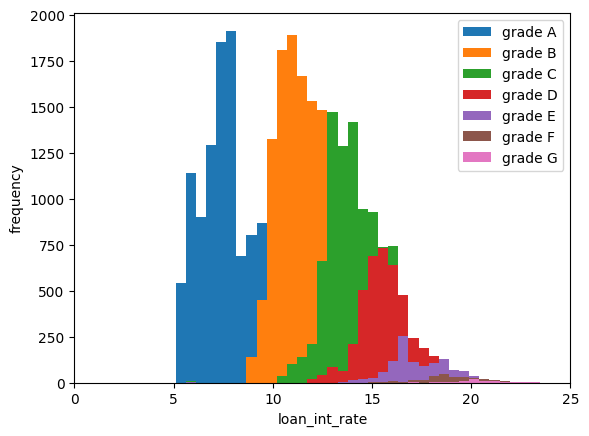

In [59]:
column = 'loan_int_rate'
grades = list(reversed(sorted(data['loan_grade'].unique())))

data_by_grade = {
    grade: data[
        (data['loan_grade'] == grade)
    ] for grade in grades
}

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

colors = list(reversed(list(matplotlib.colors.TABLEAU_COLORS.values())[0:len(grades)]))

plt.hist(
    [data_grade[column] for data_grade in data_by_grade.values()],
    bins=bins,
    label=[f'grade {grade}' for grade in data_by_grade.keys()],
    color=colors,
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right', reverse=True)

plt.savefig(f'loan_int_rate-loan_grade.pdf')
None

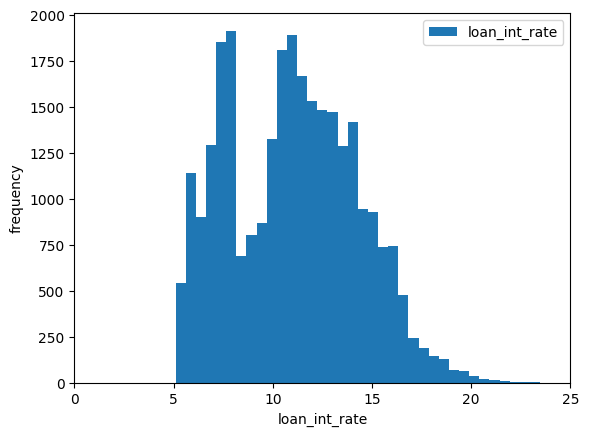

In [12]:
column = 'loan_int_rate'

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

plt.hist(
    data[column],
    bins=bins,
    label=column,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right')

plt.savefig(f'loan_int_rate-linear.pdf')
None

# Further subdivide by loan intent

In [13]:
data['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

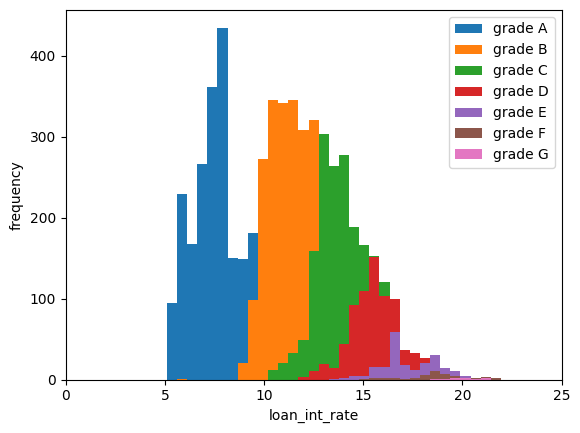

In [14]:
column = 'loan_int_rate'
grades = list(reversed(sorted(data['loan_grade'].unique())))

data_by_grade = {
    grade: data[
        (data['loan_grade'] == grade) & 
        (data['loan_intent'] == 'EDUCATION')
    ] for grade in grades
}

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

colors = list(reversed(list(matplotlib.colors.TABLEAU_COLORS.values())[0:len(grades)]))

plt.hist(
    [data_grade[column] for data_grade in data_by_grade.values()],
    bins=bins,
    label=[f'grade {grade}' for grade in data_by_grade.keys()],
    color=colors,
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right', reverse=True)

plt.savefig(f'loan_int_rate-loan_grade-EDUCATION.pdf')
None

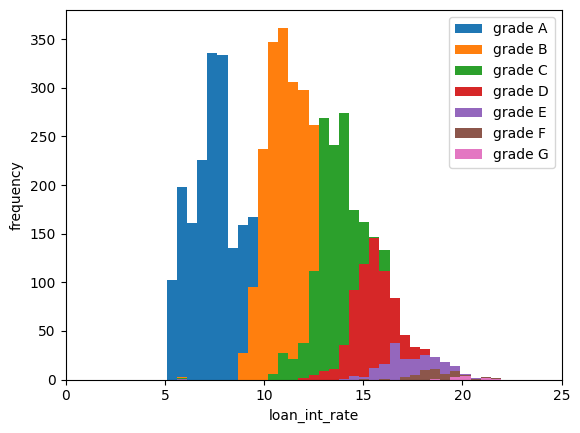

In [15]:
column = 'loan_int_rate'
grades = list(reversed(sorted(data['loan_grade'].unique())))

data_by_grade = {
    grade: data[
        (data['loan_grade'] == grade) & 
        (data['loan_intent'] == 'MEDICAL')
    ] for grade in grades
}

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

colors = list(reversed(list(matplotlib.colors.TABLEAU_COLORS.values())[0:len(grades)]))

plt.hist(
    [data_grade[column] for data_grade in data_by_grade.values()],
    bins=bins,
    label=[f'grade {grade}' for grade in data_by_grade.keys()],
    color=colors,
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right', reverse=True)

plt.savefig(f'loan_int_rate-loan_grade-MEDICAL.pdf')
None

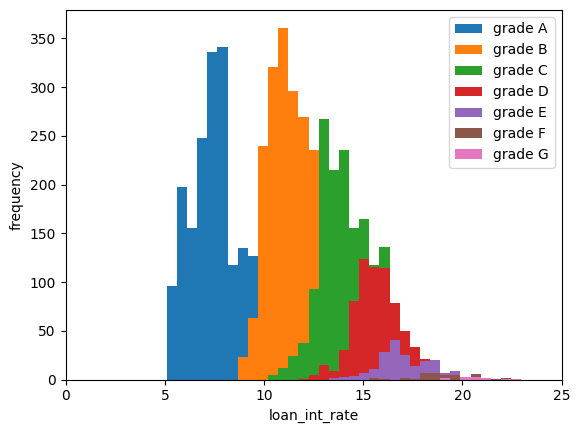

In [16]:
column = 'loan_int_rate'
grades = list(reversed(sorted(data['loan_grade'].unique())))

data_by_grade = {
    grade: data[
        (data['loan_grade'] == grade) & 
        (data['loan_intent'] == 'VENTURE')
    ] for grade in grades
}

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

colors = list(reversed(list(matplotlib.colors.TABLEAU_COLORS.values())[0:len(grades)]))

plt.hist(
    [data_grade[column] for data_grade in data_by_grade.values()],
    bins=bins,
    label=[f'grade {grade}' for grade in data_by_grade.keys()],
    color=colors,
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right', reverse=True)

plt.savefig(f'loan_int_rate-loan_grade-VENTURE.pdf')
None

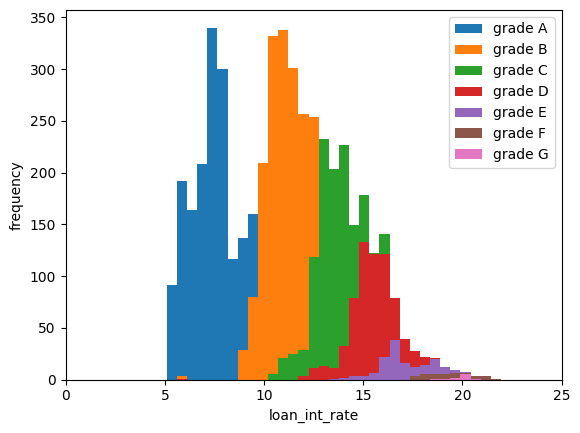

In [17]:
column = 'loan_int_rate'
grades = list(reversed(sorted(data['loan_grade'].unique())))

data_by_grade = {
    grade: data[
        (data['loan_grade'] == grade) & 
        (data['loan_intent'] == 'PERSONAL')
    ] for grade in grades
}

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

colors = list(reversed(list(matplotlib.colors.TABLEAU_COLORS.values())[0:len(grades)]))

plt.hist(
    [data_grade[column] for data_grade in data_by_grade.values()],
    bins=bins,
    label=[f'grade {grade}' for grade in data_by_grade.keys()],
    color=colors,
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right', reverse=True)

plt.savefig(f'loan_int_rate-loan_grade-PERSONAL.pdf')
None

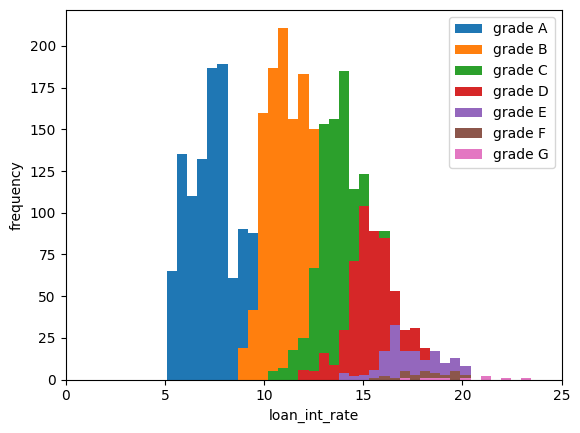

In [18]:
column = 'loan_int_rate'
grades = list(reversed(sorted(data['loan_grade'].unique())))

data_by_grade = {
    grade: data[
        (data['loan_grade'] == grade) & 
        (data['loan_intent'] == 'HOMEIMPROVEMENT')
    ] for grade in grades
}

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

colors = list(reversed(list(matplotlib.colors.TABLEAU_COLORS.values())[0:len(grades)]))

plt.hist(
    [data_grade[column] for data_grade in data_by_grade.values()],
    bins=bins,
    label=[f'grade {grade}' for grade in data_by_grade.keys()],
    color=colors,
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right', reverse=True)

plt.savefig(f'loan_int_rate-loan_grade-HOMEIMPROVEMENT.pdf')
None

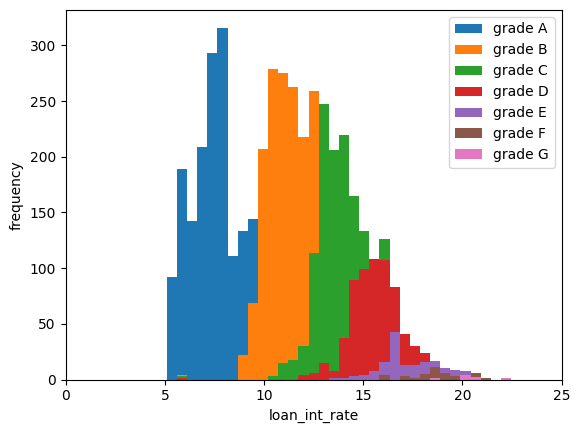

In [19]:
column = 'loan_int_rate'
grades = list(reversed(sorted(data['loan_grade'].unique())))

data_by_grade = {
    grade: data[
        (data['loan_grade'] == grade) & 
        (data['loan_intent'] == 'DEBTCONSOLIDATION')
    ] for grade in grades
}

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

colors = list(reversed(list(matplotlib.colors.TABLEAU_COLORS.values())[0:len(grades)]))

plt.hist(
    [data_grade[column] for data_grade in data_by_grade.values()],
    bins=bins,
    label=[f'grade {grade}' for grade in data_by_grade.keys()],
    color=colors,
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right', reverse=True)

plt.savefig(f'loan_int_rate-loan_grade-DEBTCONSOLIDATION.pdf')
None

# Plot by Loan Intent

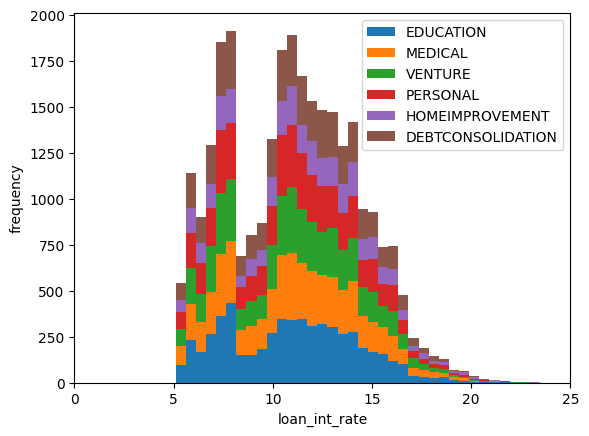

In [20]:
column = 'loan_int_rate'
loan_intent_list = data['loan_intent'].unique()

data_by_loan_intent = {
    loan_intent: data[
        (data['loan_intent'] == loan_intent)
    ] for loan_intent in loan_intent_list
}

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

plt.hist(
    [data_loan_intent[column] for data_loan_intent in data_by_loan_intent.values()],
    bins=bins,
    label=[f'{loan_intent}' for loan_intent in data_by_loan_intent.keys()],
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right')

plt.savefig(f'loan_int_rate-loan_intent.pdf')
None

# Plot Loan Interest Rate by Default

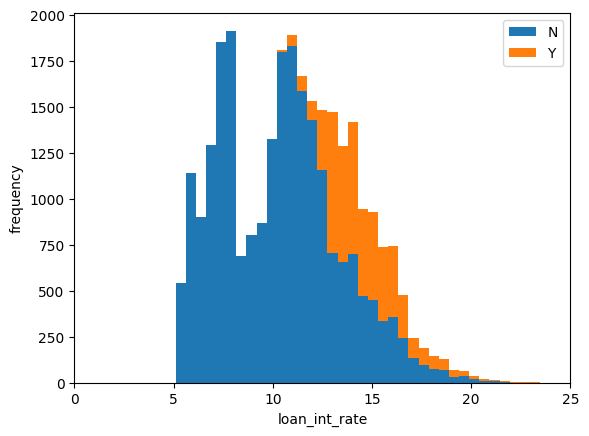

In [21]:
column = 'loan_int_rate'
cb_person_default_on_file_list = data['cb_person_default_on_file'].unique()

data_by_cb_person_default_on_file = {
    cb_person_default_on_file: data[
        (data['cb_person_default_on_file'] == cb_person_default_on_file)
    ] for cb_person_default_on_file in cb_person_default_on_file_list
}

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

plt.hist(
    [data_cb_person_default_on_file[column] for data_cb_person_default_on_file in data_by_cb_person_default_on_file.values()],
    bins=bins,
    label=[f'{cb_person_default_on_file}' for cb_person_default_on_file in data_by_cb_person_default_on_file.keys()],
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right')

plt.savefig(f'loan_int_rate-cb_person_default_on_file.pdf')
None

# Plot Loan Interest Rate by Loan Approval

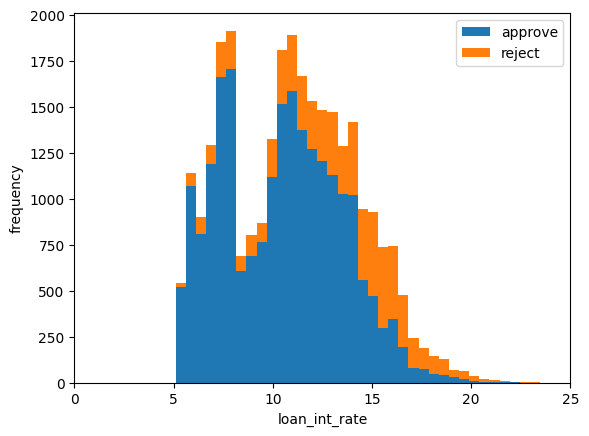

In [22]:
column = 'loan_int_rate'
loan_status_list = data['loan_status'].unique()

data_by_loan_status = {
    loan_status: data[
        (data['loan_status'] == loan_status)
    ] for loan_status in loan_status_list
}

translate = {
    1: 'reject',
    0: 'approve',
}

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

plt.hist(
    [data_loan_status[column] for data_loan_status in data_by_loan_status.values()],
    bins=bins,
    label=[f'{translate[loan_status]}' for loan_status in data_by_loan_status.keys()],
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right')

plt.savefig(f'loan_int_rate-loan_status.pdf')
None

# Plot loan grade by approve/reject

In [30]:
data_by_grade_and_status = data.groupby(
    by=['loan_grade', 'loan_status']
)['loan_int_rate'].count()

In [35]:
data_by_grade_and_status = data_by_grade_and_status.unstack() #.unstack().unstack()

In [36]:
data_by_grade_and_status

loan_status,0,1
loan_grade,,
A,8497,904
B,7696,1453
C,4540,1157
D,1325,1922
E,308,562
F,63,146
G,1,58


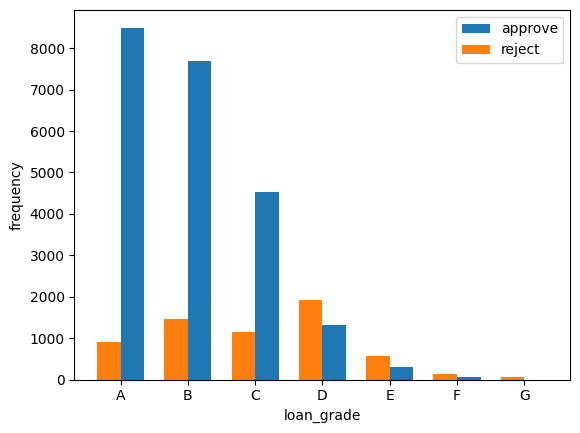

In [43]:
grades = data_by_grade_and_status.index.tolist()
x = numpy.arange(len(grades))
width = 0.35

plt.bar(x + width/2, data_by_grade_and_status[0], width, label='approve')
plt.bar(x - width/2, data_by_grade_and_status[1], width, label='reject')

plt.xlabel('loan_grade')
plt.ylabel('frequency')
plt.xticks(x, grades)
plt.legend()

plt.savefig(f'loan_grade-loan_status.pdf')
None

# Plot Loan Interest Rate grouping by Loan Grade and Loan Status

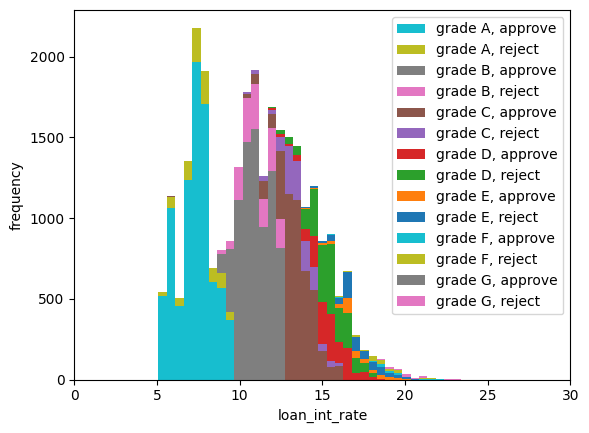

In [57]:
column = 'loan_int_rate'

loan_grade_list = list((sorted(data['loan_grade'].unique())))
loan_status_list = list(sorted(data['loan_status'].unique()))

#grade_status_list = list(reversed(sorted(data[['loan_grade', 'loan_status']].unique())))

data_by_grade_status = {
    (grade_status, loan_status): data[
        (data['loan_grade'] == grade_status) & (data['loan_status'] == loan_status)
    ] for grade_status in loan_grade_list for loan_status in loan_status_list
}

_min = 0
_max = 30
_steps = _max - _min
_steps = 60

bins = numpy.linspace(_min, _max, _steps)

colors = list(reversed(list(matplotlib.colors.TABLEAU_COLORS.values())[0:(len(loan_grade_list)*len(loan_status_list))]))
repeats = (len(loan_grade_list)*len(loan_status_list) + len(colors) - 1) // len(colors)
colors = (colors * repeats)[:len(loan_grade_list)*len(loan_status_list)]

translate = {
    0: 'approve',
    1: 'reject',
}

plt.hist(
    [data_grade_status[column] for data_grade_status in data_by_grade_status.values()],
    bins=bins,
    label=[f'grade {grade_status[0]}, {translate[grade_status[1]]}' for grade_status in data_by_grade_status.keys()],
    color=colors,
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right')

plt.savefig(f'loan_int_rate-loan_grade-loan_status.pdf')
None

# Split by Loan Status

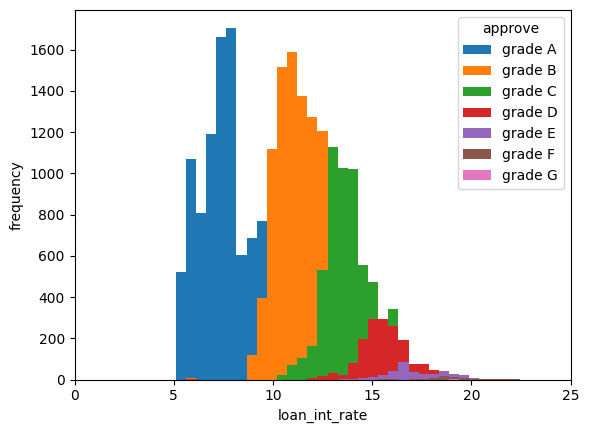

In [66]:
column = 'loan_int_rate'
grades = list(reversed(sorted(data['loan_grade'].unique())))

data_by_grade = {
    grade: data[
        (data['loan_grade'] == grade) & (data['loan_status'] == 0)
    ] for grade in grades
}

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

colors = list(reversed(list(matplotlib.colors.TABLEAU_COLORS.values())[0:len(grades)]))

plt.hist(
    [data_grade[column] for data_grade in data_by_grade.values()],
    bins=bins,
    label=[f'grade {grade}' for grade in data_by_grade.keys()],
    color=colors,
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right', reverse=True, title='approve')

plt.savefig(f'loan_int_rate-loan_grade-loan_status_approve.pdf')
None

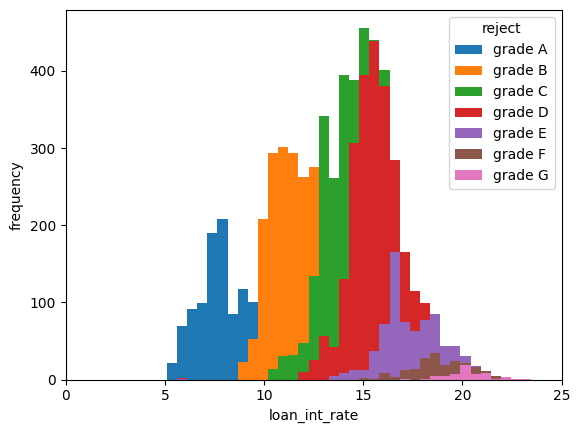

In [65]:
column = 'loan_int_rate'
grades = list(reversed(sorted(data['loan_grade'].unique())))

data_by_grade = {
    grade: data[
        (data['loan_grade'] == grade) & (data['loan_status'] == 1)
    ] for grade in grades
}

_min = 0
_max = 25
_steps = _max - _min
_steps = 50

bins = numpy.linspace(_min, _max, _steps)

colors = list(reversed(list(matplotlib.colors.TABLEAU_COLORS.values())[0:len(grades)]))

plt.hist(
    [data_grade[column] for data_grade in data_by_grade.values()],
    bins=bins,
    label=[f'grade {grade}' for grade in data_by_grade.keys()],
    color=colors,
    stacked=True,
)

plt.xlabel(column)
plt.ylabel('frequency')
plt.xlim(_min, _max)
plt.legend(loc='upper right', reverse=True, title='reject')

plt.savefig(f'loan_int_rate-loan_grade-loan_status_reject.pdf')
None